In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import scipy as sc

In [2]:
dados = pd.read_csv ('dados.csv')
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


TIPO DE DADOS:
Qualitativos e Quantitativo

Variaveis qualitativas ordinais
> variaveis que podem ser ordenadas ou hieraquizadaas

In [3]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Variaveis qualitativas nominais
> Variavel que não podem ser ordenadas ou hierarquizadas

In [4]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [5]:
sorted(dados['Sexo'].unique())

[0, 1]

In [6]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

Variaveis Qualitativas Discretas
> variaveis que representam uma contagem onde os valores possiveis formam um conjunto finto ou enumeravel

In [7]:
print('De %s até %s anos' % (dados['Idade'].min () , dados['Idade'].max ()))

De 13 até 99 anos


Observação
A variavel idade pode ser classificada de três formas distintas:
- quantitativa discreta - quando representa anos completos (numeros inteiros);
- quantitativa continua - quando representa a idade exata, sendo representado por fração ou anos, e
- quantitativa ordinal - quando representa faixas de idade
  

Varaiveis continuas
> variaveis que representam uma contagem ou mensuração que assumem valores em uma escala contunua (numeros re...)

In [8]:
print('De %s até %s metros' % (dados['Altura'].min(), dados['Altura'].max()))

De 1.339244614 até 2.028496765 metros


Distribuição de frenquencias para variaveis quantitativas

In [9]:
dados['Sexo'].value_counts()

Sexo
0    53250
1    23590
Name: count, dtype: int64

Acima devemos levar em consideração que a pesquisa refere aos 'chefes de familia' por isso o maior número de homens.

VARIAVEIS QUALITATIVAS

In [10]:
dados['Sexo'].value_counts(normalize = True)*100

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [11]:
frequencia = dados ['Sexo'].value_counts()

In [12]:
percentual = dados['Sexo'].value_counts(normalize = True)*100

In [13]:
dist_freq_qualitativos = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})

In [14]:
dist_freq_qualitativos

,Frequencia,Porcentagem (%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [15]:
dist_freq_qualitativos.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)


In [16]:
dist_freq_qualitativos

,Frequencia,Porcentagem (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


In [17]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indigina',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

In [18]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indigina,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [19]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                        normalize = True)*100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indigina,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [20]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                        aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indigina,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


Variaveis Quantitativas: 

Esta classificação se origina de um trabalho que faz a divisão em quantidade de salários mínimos que compõe o rendimento do domicílio:

A: acima de 20;
B: de 10 a 20;
C: de 4 a 10;
D: de 2 a 4;
E: de zero até 2 salários mínimos.
Como a pesquisa PNAD na qual baseamos nossos dados foi realizada em 2015, o valor do salário mínimo era de R$788,00.

In [21]:
dados.Renda.min()

0

In [22]:
dados.Renda.max()

200000

In [23]:
classes = [0,1576,3152,7880,15760,200000]

In [24]:
labels = ['E','D','C','B','A']

> Criar a tabela de Frequencias

In [25]:
pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [26]:
pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)



C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\421703833.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(


Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [27]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\1990742766.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(


Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [28]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)
percentual

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\429960088.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Renda
E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: proportion, dtype: float64

In [29]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
Renda,,
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


In [30]:
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
Renda,,
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


> Variavel Altura

In [31]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\1120227437.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(
C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\1120227437.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Estaturas,Frequência,Porcentagem (%)
Altura,,
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


Distribuição de Frequencia para variaveis quantitativas

In [32]:
import numpy as np

In [33]:
n = dados.shape[0]
n

76840

In [34]:
k = 1 + (10/3)* np.log10(n)
k

17.285291187298853

In [35]:
k = int(k.round(0))
k

17

Criar a tabela de frequencias

In [36]:
Frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)  
Frequencia

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\1836269202.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Frequencia = pd.value_counts(


Renda
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [37]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)  
percentual

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\3175710607.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Renda
(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: proportion, dtype: float64

In [38]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': Frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
Renda,,
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078


HISTOGRAMA

In [39]:
import seaborn as sns

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\594844699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura, kde = False)


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Altura (metros)'>

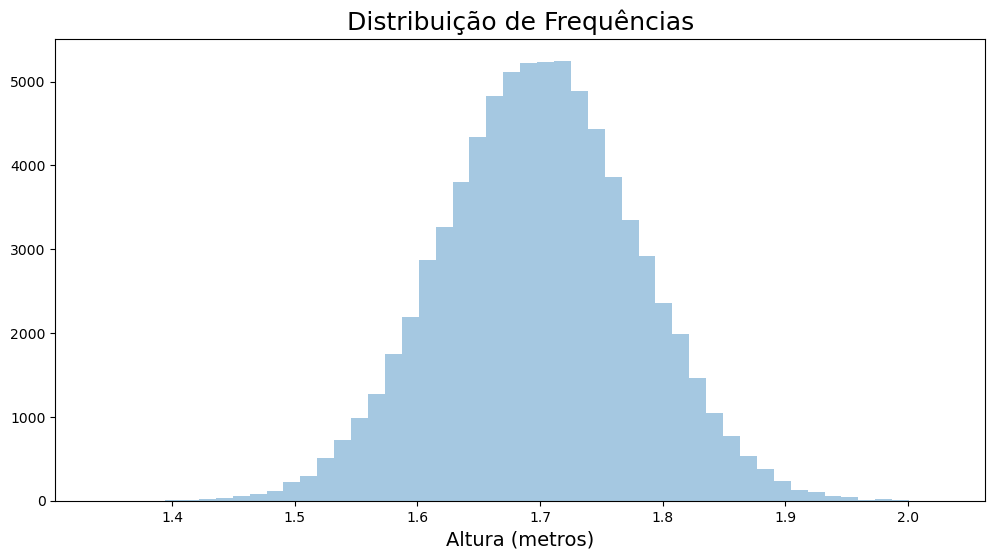

In [40]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\2084142745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: title={'center': 'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

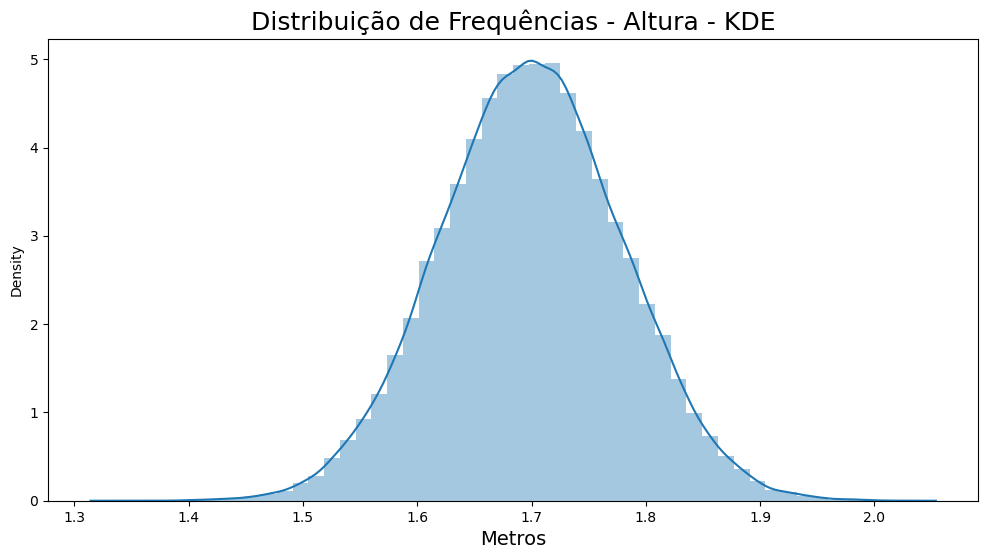

In [41]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

HISTOGRAMA - PANDAS

<Axes: >

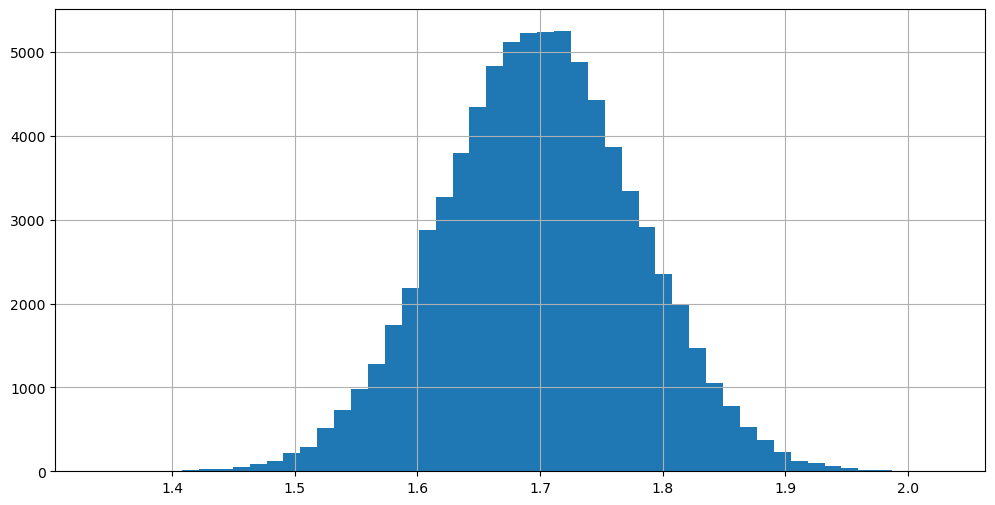

In [42]:
dados.Altura.hist(bins = 50, figsize=(12,6))

<Axes: xlabel='Renda'>

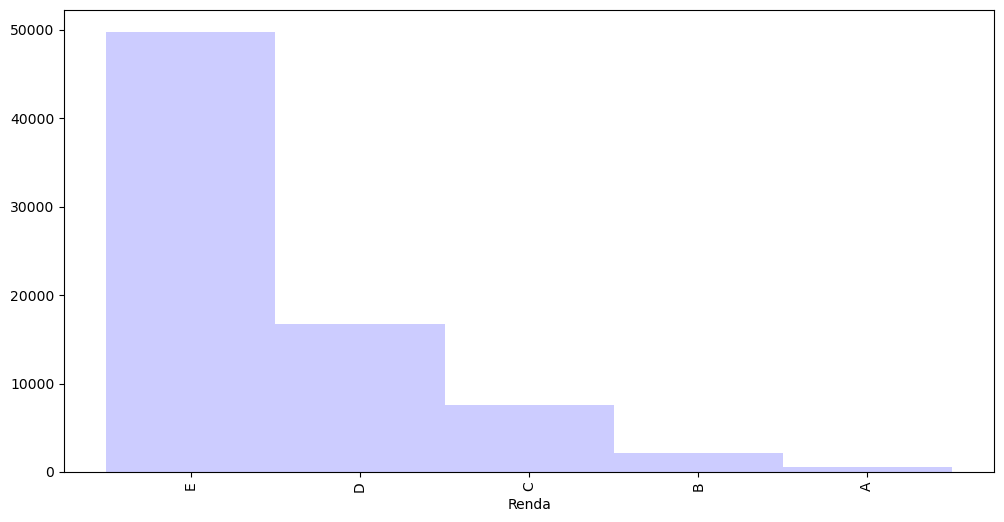

In [43]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color= 'blue', alpha = 0.2, figsize= (12, 6))

Calculo das médias da Renda por Idade

In [44]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

Calculo da mediana da Renda 

In [45]:
dados.Renda.median()

1200.0

In [46]:
dados.Renda.quantile()

1200.0

Moda da Renda

In [47]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

Analise grafica da variavel RENDA

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\851190851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda <20000').Renda)


<Axes: xlabel='Renda', ylabel='Density'>

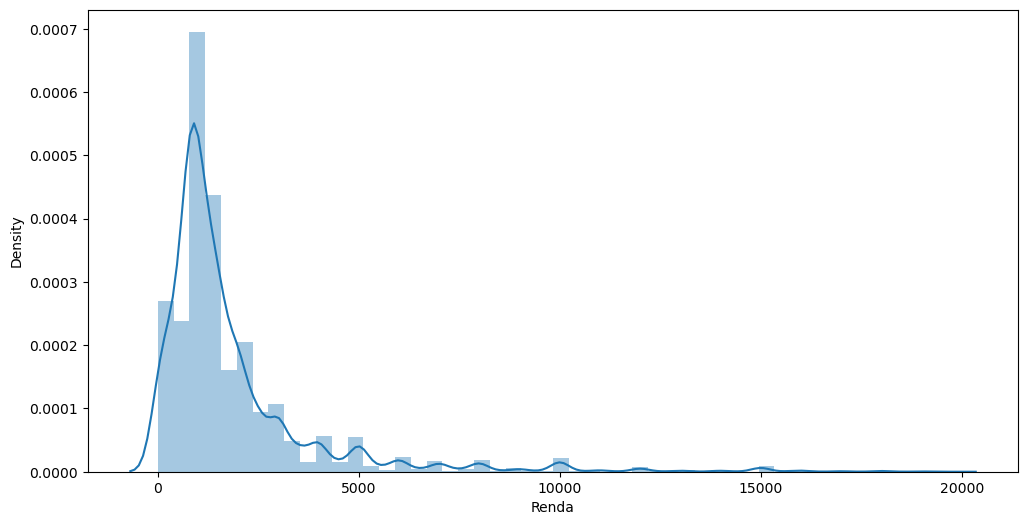

In [48]:
ax = sns.distplot(dados.query('Renda <20000').Renda)
ax.figure.set_size_inches(12,6)
ax

In [49]:
Moda = dados.Renda.mode()[0]
Moda

788

In [50]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [51]:
Media = dados.Renda.mean()
Media

2000.3831988547631

In [52]:
Moda < Mediana < Media

True

Variavel ALTURA

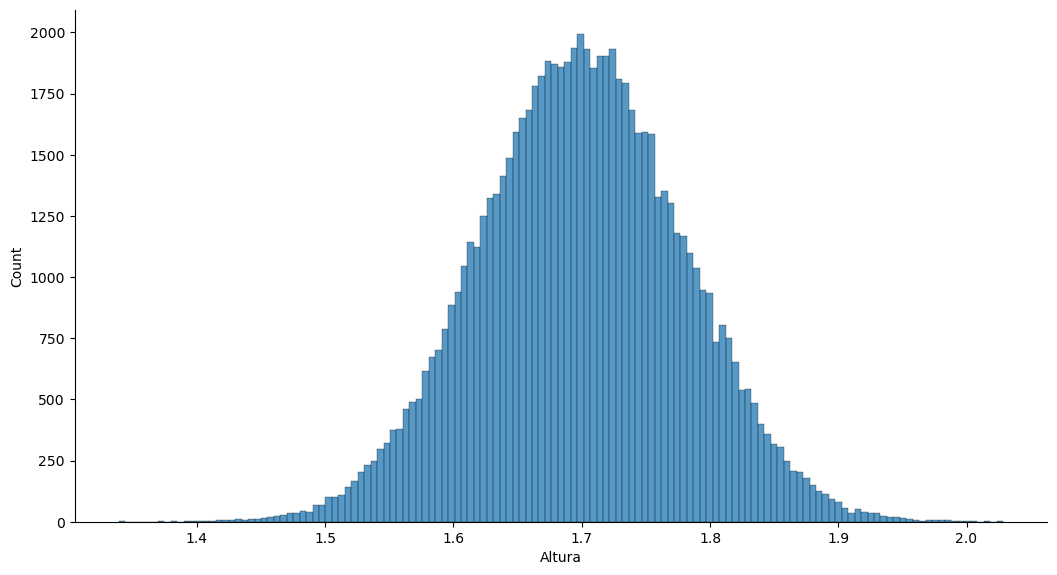

In [53]:
ax = sns.displot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [54]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [55]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [56]:
Media = dados.Altura.mean()
Media

1.6995124540575741

Variavel ANOS DE ESTUDO

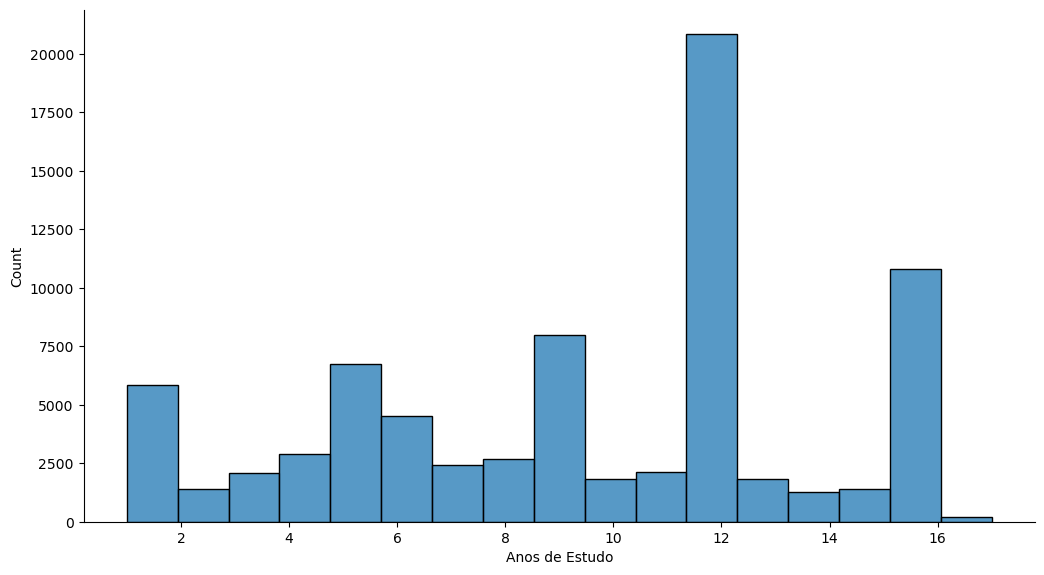

In [57]:
ax = sns.displot(dados['Anos de Estudo'], bins =17)
ax.figure.set_size_inches(12, 6)
ax

In [58]:
Moda = dados['Anos de Estudo'].mode()[0]
Moda

12

In [59]:
Mediana = dados['Anos de Estudo'].median()
Mediana

11.0

In [60]:
Media = dados['Anos de Estudo'].mean()
Media

9.469664237376367

In [61]:
Moda > Mediana > Media

True

MEDIDAS SEPARATRIZES
> Quartis, decis e percentis

In [62]:
dados.Renda.quantile([0.25,0.5,0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [63]:
[i/10 for i in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [64]:
dados.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [65]:
dados.Renda.quantile([i/100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\2395262219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade,


<Axes: title={'center': 'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

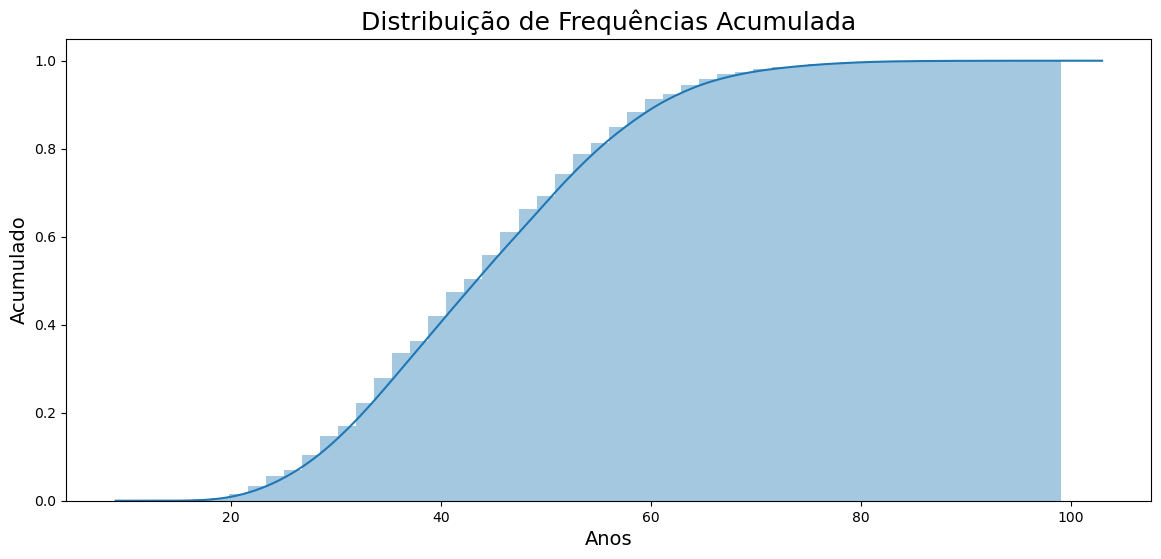

In [66]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

C:\Users\gusta\AppData\Local\Temp\ipykernel_20380\4231314049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade,


<Axes: title={'center': 'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

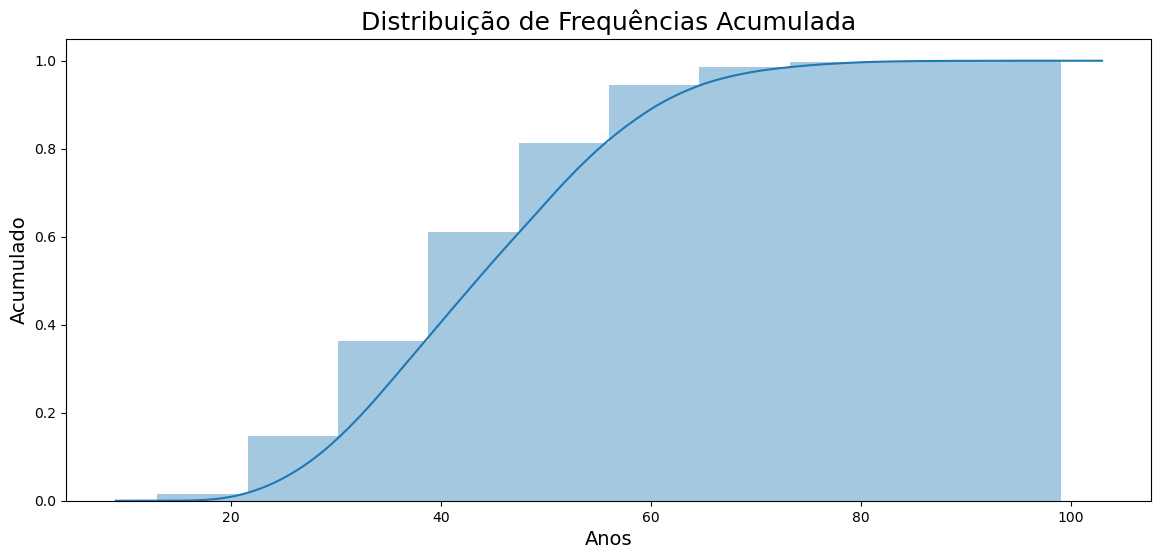

In [67]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True},
                  bins = 10)
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

Visualizado dos Dados com BOXPLOT

<Axes: title={'center': 'Renda'}, xlabel='R$'>

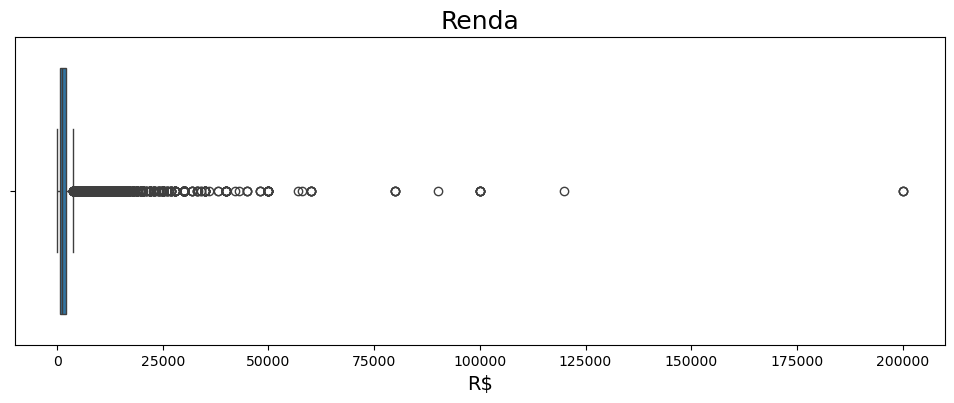

In [68]:
ax = sns.boxplot( x = 'Renda', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

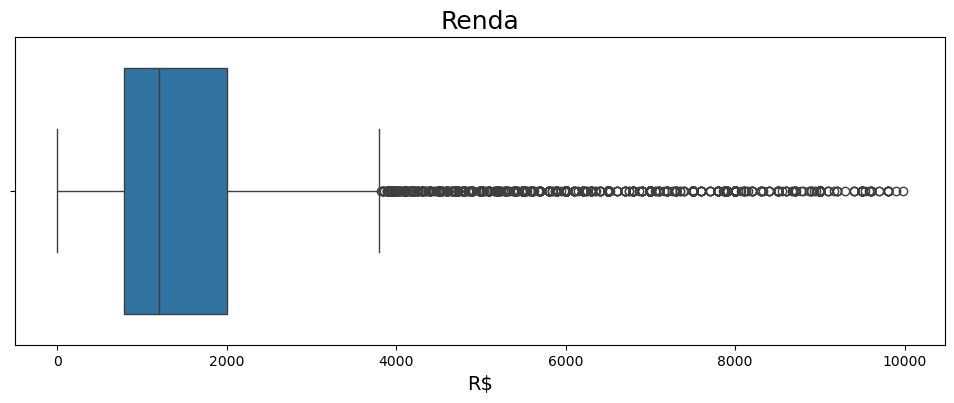

In [69]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

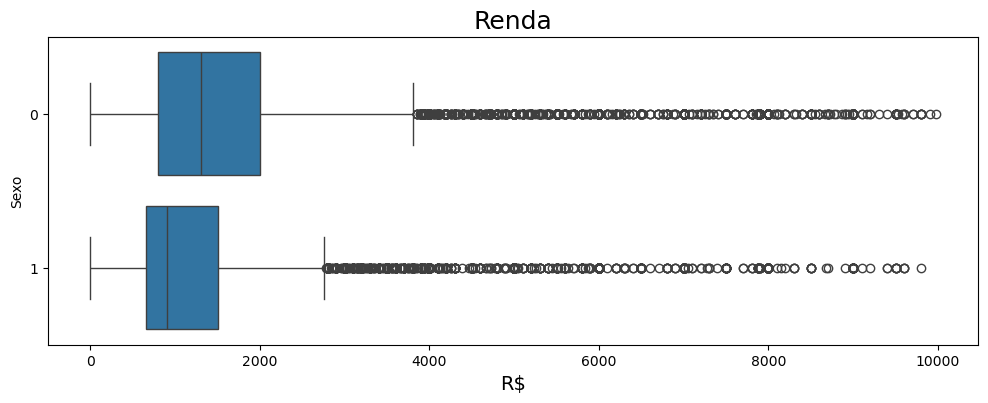

In [70]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos'>

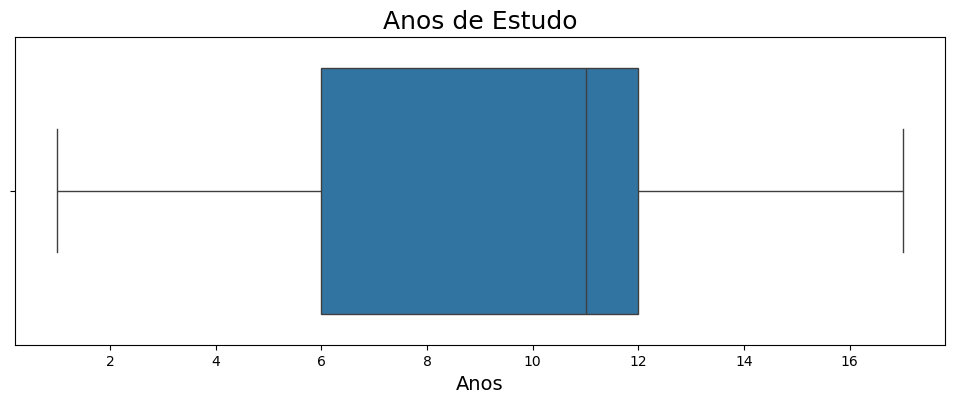

In [71]:
ax = sns.boxplot( x = 'Anos de Estudo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

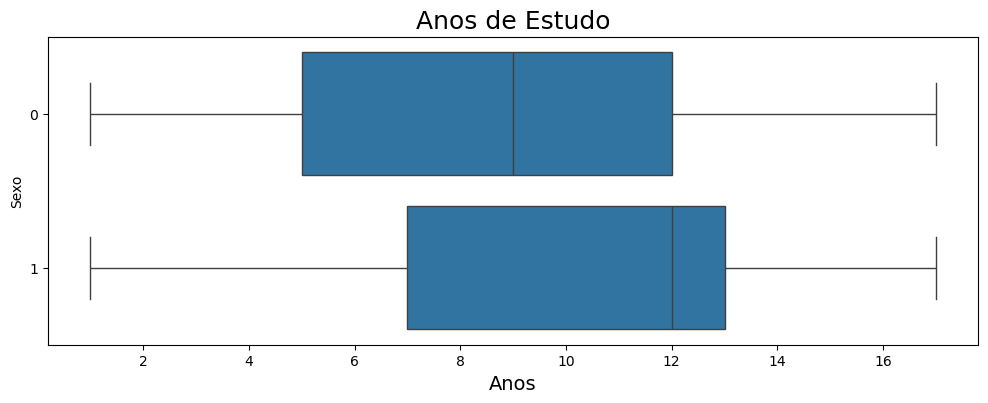

In [72]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

> DISTRIBUIÇÃO DE PROBABILIDADE

* Distribuição Binominal

In [73]:
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm

* Amostra dos dados Aleatoria Simples

In [75]:
dados.shape[0]

76840

In [83]:
amostra = dados.sample(n=1000, random_state =101)

In [84]:
amostra.shape[0]

1000

In [85]:
amostra.Renda.mean()

1998.783

In [86]:
dados.Sexo.value_counts(normalize = True)

Sexo
0    0.692998
1    0.307002
Name: proportion, dtype: float64

In [87]:
amostra.Sexo.value_counts(normalize = True)

Sexo
0    0.706
1    0.294
Name: proportion, dtype: float64

* Estimação

In [88]:
n = 2000
total_de_amostras =1500

In [89]:
amostras = pd.DataFrame()
amostras

""


In [91]:
for i in range (total_de_amostras):
    _ = dados.Idade.sample(n)
    _.index = range(0,len(_))
    amostras['Amostra_'+str(i)] = _
amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,39,31,40,79,65,79,49,45,33,51,...,68,33,53,32,43,45,24,52,66,47
1,41,32,22,55,22,30,28,38,60,33,...,42,65,29,32,25,44,59,43,40,28
2,38,25,42,38,34,46,69,46,59,38,...,29,64,44,43,47,54,44,38,55,35
3,55,37,35,58,37,33,34,26,43,25,...,52,48,49,58,40,51,52,39,57,48
4,52,31,29,23,23,53,45,39,30,41,...,42,37,30,47,61,18,43,38,55,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,41,64,43,51,52,45,43,37,52,25,...,44,21,24,62,46,43,46,62,52,40
1996,32,33,34,54,58,23,83,67,37,28,...,28,60,51,35,49,34,77,74,42,47
1997,41,38,44,53,33,36,39,24,55,48,...,42,46,53,56,28,85,28,28,57,28
1998,52,37,30,32,51,34,43,60,34,39,...,40,49,57,40,58,59,33,43,35,38


In [93]:
# media do conjunto de amostras criado
amostras.mean().mean()

44.067391666666666

<Axes: >

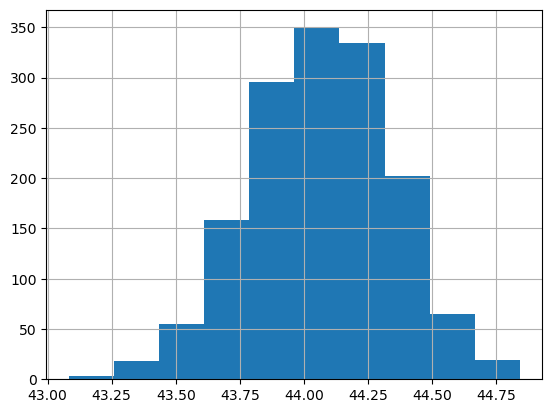

In [95]:
#histograma sinaliza que tem o formato de "sino" o que significa uma Distribuição Normal
amostras.mean().hist()

In [97]:
# Observando os dados reais dos dados originais observamos que está proximo do modelo da amostra
dados.Idade.mean()

44.07142113482561

In [103]:
# desvio padrão do conjunto de dados
dados.Idade.std()

12.480583465360187

In [102]:
# desvio padrão da amostra
amostras.mean().std()

0.2760000001762445

In [105]:
# realizando o calculo diviindo a raiz de 'n' com o metodo np.sqrt() recebendo o 'n' recebemos o valor 0.27 proximo ao desvio padrão
dados.Idade.std() / np.sqrt(n)

0.2790743302740527